<H2>MILESTONE 4 - Interpretation of data & Communication of Insights of data  </H2>
<H4>NAME : ZAIMIE AZMIN BIN ZAINUL ABIDIN</H4>
<H4>MATRIX : 17202336 / WQD190018</H4>

<H1>Forecasting Brent Crude Oil Price</H1>

This notebook explains on forecasting Brent crude oil closing price using two machine learning models which are Support Vector Machine (SVM) and Linear Regression.

In [17]:
# Import needed libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt

<h4>Step 1: Load the Data (from csv file scrap from website - mywebscrapBrentFinal.csv)

In [18]:
df = pd.read_csv('mywebscrapBrentFinal.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 5 columns):
Date             3675 non-null object
Closing Price    3675 non-null float64
Open             3626 non-null float64
Daily High       3647 non-null float64
Daily Low        3645 non-null float64
dtypes: float64(4), object(1)
memory usage: 143.6+ KB


In [20]:
df.head()

,Date,Closing Price,Open,Daily High,Daily Low
0,03/11/20,35.79,37.27,39.70,35.35
1,03/10/20,37.22,35.84,38.22,35.00
2,03/09/20,34.36,38.28,38.34,31.02
3,03/06/20,45.27,50.25,50.45,45.18
4,03/05/20,49.99,51.66,52.04,49.70


In [21]:
df.tail()

,Date,Closing Price,Open,Daily High,Daily Low
3670,01/09/06,62.24,62.24,62.24,62.24
3671,01/06/06,61.62,61.62,61.62,61.62
3672,01/05/06,61.05,61.05,61.05,61.05
3673,01/04/06,60.37,60.37,60.37,60.37
3674,01/03/06,58.16,58.16,58.16,58.16


In [22]:
df.describe()

,Closing Price,Open,Daily High,Daily Low
count,3675.000000,3626.000000,3647.000000,3645.000000
mean,78.408506,78.281627,79.315898,77.422038
std,24.637651,24.591547,24.746238,24.507410
min,28.790000,28.300000,29.210000,27.840000
25%,59.510000,59.362500,60.280000,58.550000
50%,72.300000,72.115000,73.190000,71.500000
75%,104.300000,104.157500,105.315000,103.230000
max,146.080000,146.300000,147.500000,144.760000


<h4>Step 2: Understanding & Cleaning the Data

In [23]:
# Print the column names
df.columns

Index([u'Date', u'Closing Price', u'Open', u'Daily High', u'Daily Low'], dtype='object')

In [24]:
# Rename column names
df.columns = ['Date', 'Close', 'Open', 'High', 'Low']
df.columns

Index([u'Date', u'Close', u'Open', u'High', u'Low'], dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 5 columns):
Date     3675 non-null object
Close    3675 non-null float64
Open     3626 non-null float64
High     3647 non-null float64
Low      3645 non-null float64
dtypes: float64(4), object(1)
memory usage: 143.6+ KB


In [26]:
# Change column type 
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
# Check the data type of column Date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 5 columns):
Date     3675 non-null datetime64[ns]
Close    3675 non-null float64
Open     3626 non-null float64
High     3647 non-null float64
Low      3645 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 143.6 KB


In [28]:
df.head()

,Date,Close,Open,High,Low
0,2020-03-11,35.79,37.27,39.70,35.35
1,2020-03-10,37.22,35.84,38.22,35.00
2,2020-03-09,34.36,38.28,38.34,31.02
3,2020-03-06,45.27,50.25,50.45,45.18
4,2020-03-05,49.99,51.66,52.04,49.70


In [29]:
df = df.sort_index(ascending=False).reset_index(drop=True)
df.head()

,Date,Close,Open,High,Low
0,2006-01-03,58.16,58.16,58.16,58.16
1,2006-01-04,60.37,60.37,60.37,60.37
2,2006-01-05,61.05,61.05,61.05,61.05
3,2006-01-06,61.62,61.62,61.62,61.62
4,2006-01-09,62.24,62.24,62.24,62.24


In [30]:
df.tail()

,Date,Close,Open,High,Low
3670,2020-03-05,49.99,51.66,52.04,49.70
3671,2020-03-06,45.27,50.25,50.45,45.18
3672,2020-03-09,34.36,38.28,38.34,31.02
3673,2020-03-10,37.22,35.84,38.22,35.00
3674,2020-03-11,35.79,37.27,39.70,35.35


In [31]:
# For ease of work, the date becomes the index
df.set_index('Date', inplace=True)
df.head()

,Close,Open,High,Low
Date,,,,
2006-01-03,58.16,58.16,58.16,58.16
2006-01-04,60.37,60.37,60.37,60.37
2006-01-05,61.05,61.05,61.05,61.05
2006-01-06,61.62,61.62,61.62,61.62
2006-01-09,62.24,62.24,62.24,62.24


In [32]:
#Check and replace missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3675 entries, 2006-01-03 to 2020-03-11
Data columns (total 4 columns):
Close    3675 non-null float64
Open     3626 non-null float64
High     3647 non-null float64
Low      3645 non-null float64
dtypes: float64(4)
memory usage: 143.6 KB


In [33]:
df.isnull().sum()

Close     0
Open     49
High     28
Low      30
dtype: int64

In [34]:
#Using only [Close] column to predict Brent price
brent = df[['Close']].copy()
brent.head()

,Close
Date,
2006-01-03,58.16
2006-01-04,60.37
2006-01-05,61.05
2006-01-06,61.62
2006-01-09,62.24


In [40]:
# 'n' days prediction 
forecast_out = 30
# Create column for target or dependent variable - shifted 'n' up
brent['Prediction'] = df['Close'].shift(-forecast_out).copy()
# The latest data becomes the prediction for the previous data
brent.tail(31)

,Close,Prediction
Date,,
2020-01-29,59.81,35.79
2020-01-30,58.29,NaN
2020-01-31,58.16,NaN
2020-02-03,54.45,NaN
2020-02-04,53.96,NaN
2020-02-05,55.28,NaN
2020-02-06,54.93,NaN
2020-02-07,54.47,NaN
2020-02-10,53.27,NaN


As we can see, the data closing price for date 2020-03-11 is used as the prediction for the closing price for date 2019-10-21 - which is 100 days interval.

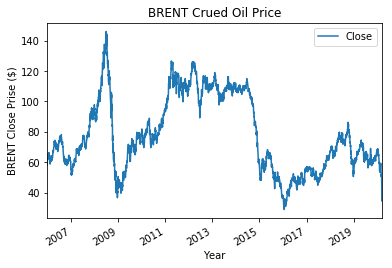

In [43]:
#Scale & Plot the data
brent[['Close']].plot()
plt.title('BRENT Crued Oil Price')
plt.xlabel('Year')
plt.ylabel('BRENT Close Prise ($)')
plt.show()

In [44]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_brent = scaler.fit_transform(brent)
scaled_brent

array([[0.25040498, 0.26225595],
       [0.26924717, 0.26839458],
       [0.27504476, 0.26148862],
       ...,
       [0.04748913,        nan],
       [0.07187313,        nan],
       [0.05968113,        nan]])

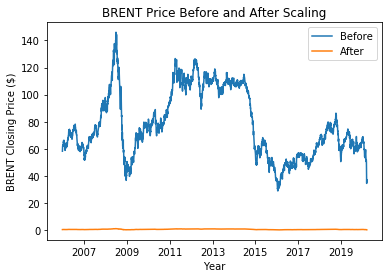

In [45]:
plt.plot(brent['Close'], label='Before')
plt.plot(brent.index,[i[0] for i in scaled_brent], label='After')
plt.legend()
plt.xlabel('Year')
plt.ylabel('BRENT Closing Price ($)')
plt.title('BRENT Price Before and After Scaling')
plt.show()

<h4>Step 3: Splitting the dataset and create the independent data set, X

In [47]:
x = [[i[0]] for i in scaled_brent]
x = np.array(x[:-forecast_out])
x

array([[0.25040498],
       [0.26924717],
       [0.27504476],
       ...,
       [0.260295  ],
       [0.26191491],
       [0.26447267]])

In [48]:
# Create the dependent data set y
y = [i[1] for i in scaled_brent]
y = np.array(y[:-forecast_out])
y

array([0.26225595, 0.26839458, 0.26148862, ..., 0.04748913, 0.07187313,
       0.05968113])

In [49]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=0
)

<h4>Step 4: Modeling</h4>
<br>i) Building SVM model

In [51]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [52]:
# Testing model: score returns the coefficient of determination R^2 of the prediction.
svm_confidence = svr_rbf.score(x_test, y_test)

In [53]:
svm_confidence

0.8785089674939943

ii)Building Linear Regression model

In [55]:
# create lr and train linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
lr_confidence = lr.score(x_test, y_test)

In [57]:
lr_confidence

0.8769199531933708

<h4>Step 5: Predict using the model</h4>

In [61]:
# Print the support vector regressor
#SVM PREDICTION
svm_prediction = svr_rbf.predict(x_forecast)
svm_pred = scaled_brent.copy()
svm_pred[-30:,1] = svm_prediction
svm_result = pd.DataFrame(scaler.inverse_transform(svm_pred),columns=['Close', 'Prediction'])
svm_result[-31:]

,Close,Prediction
3644,59.81,35.790000
3645,58.29,56.793929
3646,58.16,56.673963
3647,54.45,53.336315
3648,53.96,52.908608
3649,55.28,54.068023
3650,54.93,53.758376
3651,54.47,53.353840
3652,53.27,52.311820
3653,54.01,52.952104


In [62]:
#LINEAR REGRESSION PREDICTION
x_forecast = np.array([[i[0]] for i in scaled_brent][-30:])
lr_prediction = lr.predict(x_forecast)
lr_pred = scaled_brent.copy()
lr_pred[-30:,1] = lr_prediction
lr_result = pd.DataFrame(scaler.inverse_transform(lr_pred),columns=['Close', 'Prediction'])
lr_result[-31:]

,Close,Prediction
3644,59.81,35.790000
3645,58.29,59.431371
3646,58.16,59.309420
3647,54.45,55.829110
3648,53.96,55.369447
3649,55.28,56.607724
3650,54.93,56.279393
3651,54.47,55.847872
3652,53.27,54.722165
3653,54.01,55.416351


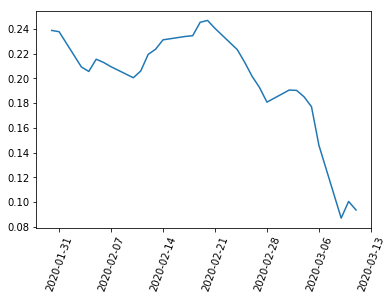

In [70]:
plt.plot(brent.index[-30:],svm_prediction)
plt.xticks(rotation=70)
plt.show()

In [79]:
svm_prediction

array([0.23875803, 0.23773521, 0.20927884, 0.20563226, 0.21551729,
       0.21287728, 0.20942826, 0.20054413, 0.20600311, 0.21938815,
       0.22359397, 0.2311666 , 0.23389495, 0.2345203 , 0.24532691,
       0.24683986, 0.24041377, 0.22328701, 0.21302777, 0.20171905,
       0.19262082, 0.18083361, 0.19060862, 0.19032194, 0.18512496,
       0.17714374, 0.14596091, 0.08713013, 0.10058673, 0.09367248])

In [80]:
brent.index[-30:]

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-09',
               '2020-03-10', '2020-03-11'],
              dtype='datetime64[ns]', name=u'Date', freq=None)

In [83]:
svm_result[-30:]

,Close,Prediction
3645,58.29,56.793929
3646,58.16,56.673963
3647,54.45,53.336315
3648,53.96,52.908608
3649,55.28,54.068023
3650,54.93,53.758376
3651,54.47,53.353840
3652,53.27,52.311820
3653,54.01,52.952104
3654,55.79,54.522037


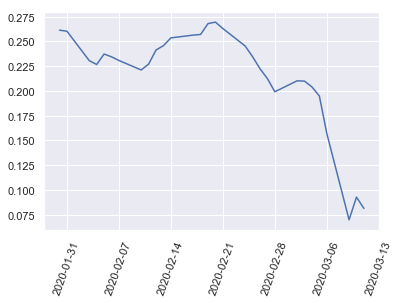

In [129]:
plt.plot(brent.index[-30:],lr_prediction)
plt.xticks(rotation=70)
plt.show()

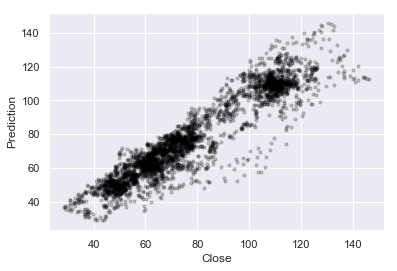

In [133]:
import matplotlib.pyplot as plt

X = svm_result[["Close","Prediction"]]
#Visualise data points
plt.scatter(X["Close"],X["Prediction"],alpha=0.2,c='black',s=10)
plt.xlabel('Close')
plt.ylabel('Prediction')
plt.show()

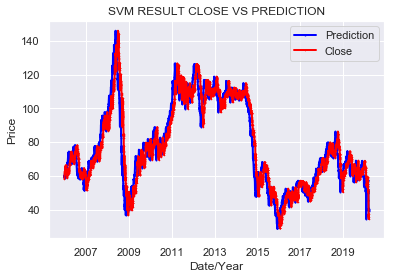

In [135]:
plt.plot(brent.index[:],svm_result["Prediction"],marker='o', markerfacecolor='blue', markersize=1, color='blue', linewidth=2)
plt.plot(brent.index[:],svm_result["Close"],marker='x', markerfacecolor='red', markersize=1, color='red', linewidth=2)

plt.xlabel('Date/Year')
# Set the y axis label of the current axis.
plt.ylabel('Price')
# Set a title of the current axes.
plt.title('SVM RESULT CLOSE VS PREDICTION')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

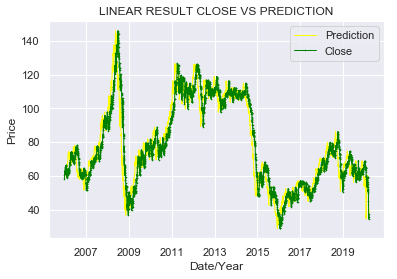

In [134]:
plt.plot(brent.index[:],lr_result["Prediction"],marker='', markerfacecolor='orange', markersize=1, color='yellow', linewidth=1)
plt.plot(brent.index[:],lr_result["Close"],marker='x', markerfacecolor='green', markersize=1, color='green', linewidth=1)


plt.xlabel('Date/Year')
# Set the y axis label of the current axis.
plt.ylabel('Price')
# Set a title of the current axes.
plt.title('LINEAR REGRESSION RESULT CLOSE VS PREDICTION')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()